In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sp500_index = pd.read_csv('sp500_index.csv')
sp500_stocks = pd.read_csv('sp500_stocks.csv')
sp500_companies = pd.read_csv('sp500_companies.csv')

# Parse date columns
sp500_index['Date'] = pd.to_datetime(sp500_index['Date'])
sp500_stocks['Date'] = pd.to_datetime(sp500_stocks['Date'])


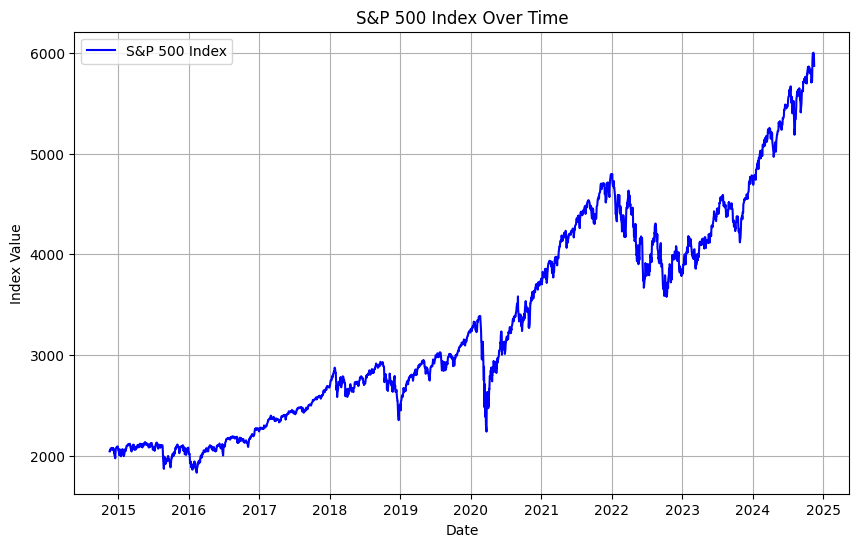

In [29]:

# Visualization 1: S&P 500 Index Time Series
plt.figure(figsize=(10, 6))
plt.plot(sp500_index['Date'], sp500_index['S&P500'], label='S&P 500 Index', color='blue')
plt.title('S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


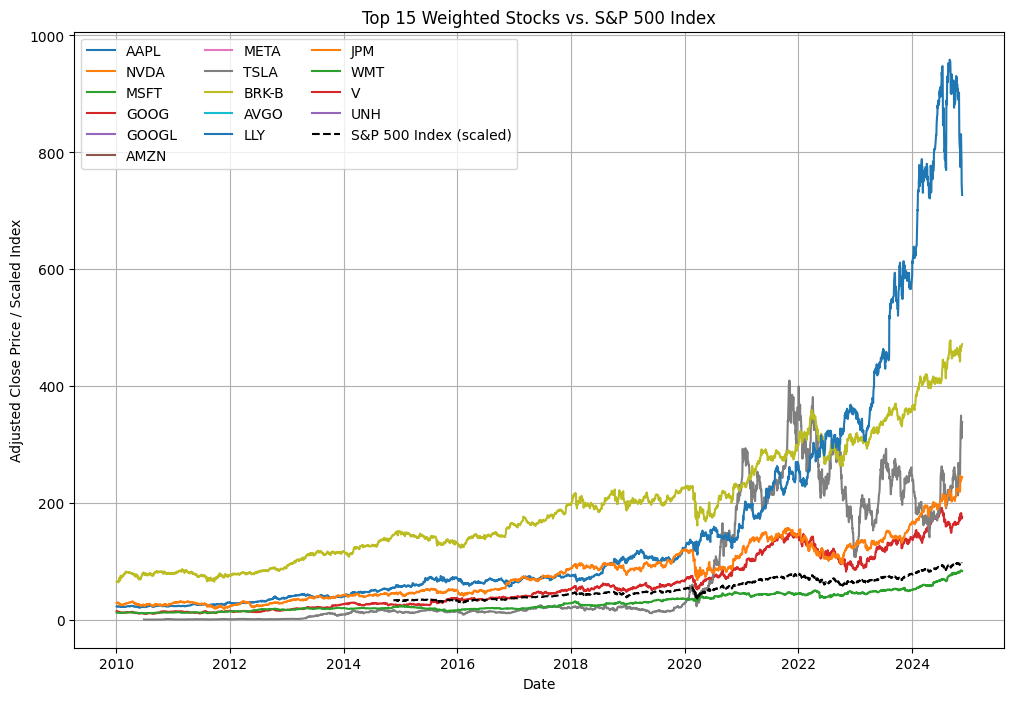

In [62]:
# Visualization 2: Individual Stock Prices vs. Index

# Identify the top 15 weighted stocks
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']

# Visualization 2.1: Top 15 Weighted Stocks vs. S&P 500 Index
plt.figure(figsize=(12, 8))
for symbol in top_15_stocks:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label=f'{symbol}')

plt.plot(sp500_index['Date'], sp500_index['S&P500'] / sp500_index['S&P500'].max() * 100, 
         label='S&P 500 Index (scaled)', linestyle='--', color='black')
plt.title('Top 15 Weighted Stocks vs. S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price / Scaled Index')
plt.legend(ncol=3)
plt.grid(True)
plt.show()

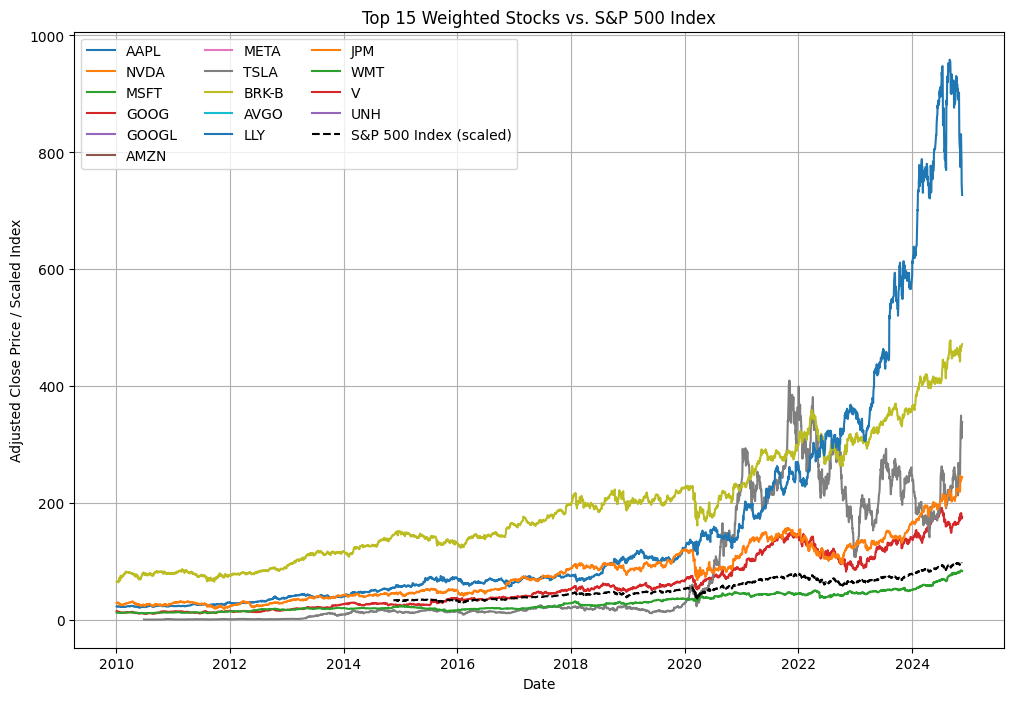

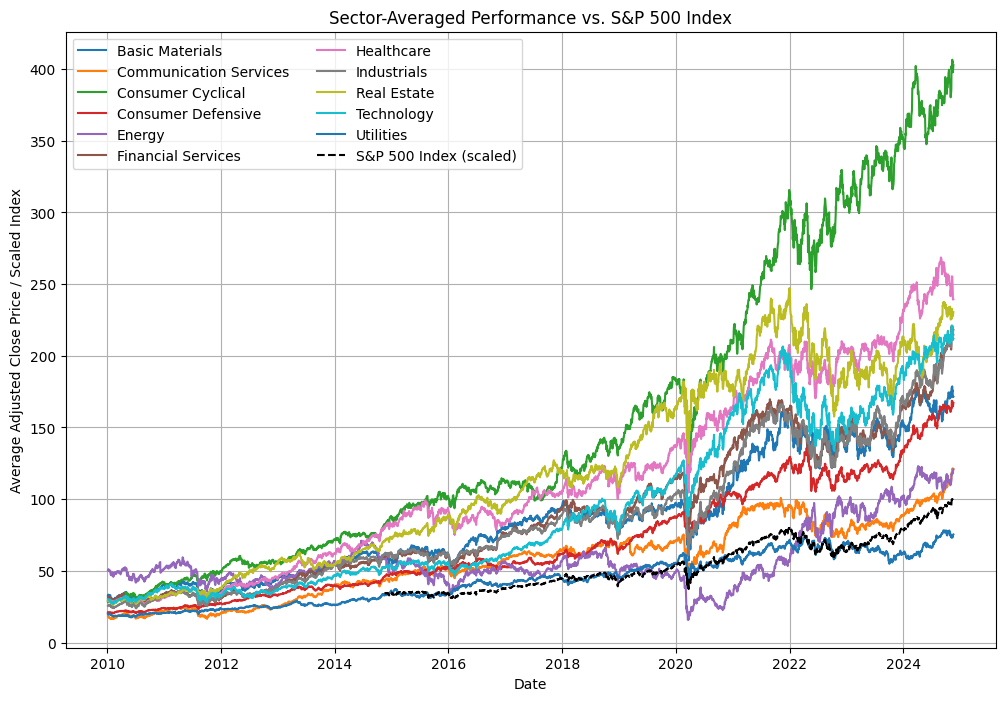

In [30]:

# Visualization 2: Individual Stock Prices vs. Index

# Identify the top 15 weighted stocks
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']

# Visualization 2.1: Top 15 Weighted Stocks vs. S&P 500 Index
plt.figure(figsize=(12, 8))
for symbol in top_15_stocks:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label=f'{symbol}')

plt.plot(sp500_index['Date'], sp500_index['S&P500'] / sp500_index['S&P500'].max() * 100, 
         label='S&P 500 Index (scaled)', linestyle='--', color='black')
plt.title('Top 15 Weighted Stocks vs. S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price / Scaled Index')
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Add sector information to stock data
sp500_stocks_with_sector = sp500_stocks.merge(sp500_companies[['Symbol', 'Sector']], on='Symbol')

# Calculate sector averages over time
sector_averages = sp500_stocks_with_sector.groupby(['Date', 'Sector'])['Adj Close'].mean().reset_index()

# Visualization 2.2: Sector-Averaged Performance vs. S&P 500 Index
plt.figure(figsize=(12, 8))
for sector in sector_averages['Sector'].unique():
    sector_data = sector_averages[sector_averages['Sector'] == sector]
    plt.plot(sector_data['Date'], sector_data['Adj Close'], label=sector)

plt.plot(sp500_index['Date'], sp500_index['S&P500'] / sp500_index['S&P500'].max() * 100, 
         label='S&P 500 Index (scaled)', linestyle='--', color='black')
plt.title('Sector-Averaged Performance vs. S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Average Adjusted Close Price / Scaled Index')
plt.legend(ncol=2)
plt.grid(True)
plt.show()


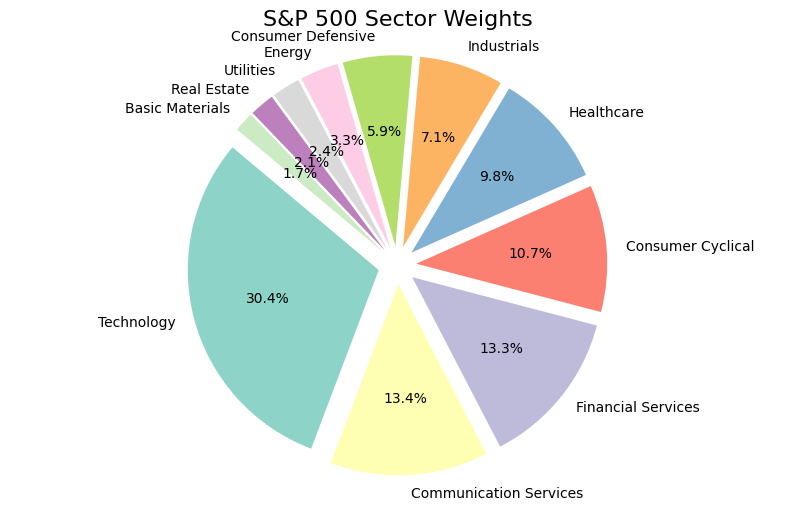

In [31]:
# Visualization 3: Sector Weights
# Refined Pie Chart for S&P 500 Sector Weights
plt.figure(figsize=(10, 6))

# Create the pie chart with sector weights
sector_weights = sp500_companies.groupby('Sector')['Weight'].sum().sort_values(ascending=False)

# Plot the pie chart
sector_colors = sns.color_palette('Set3', n_colors=len(sector_weights))
plt.pie(sector_weights, labels=sector_weights.index, autopct='%1.1f%%', startangle=140, colors=sector_colors, 
        explode=[0.1] * len(sector_weights))  # Explode all slices slightly for emphasis

# Add title and a clean layout
plt.title('S&P 500 Sector Weights', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Display the plot
plt.show()


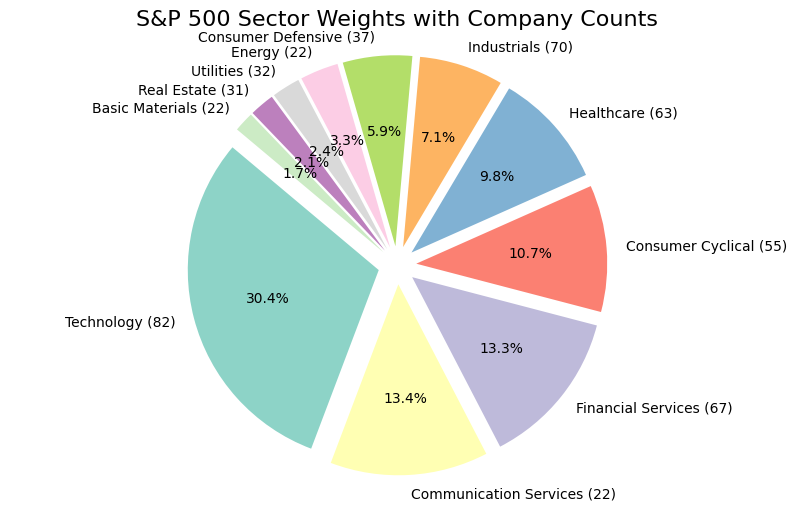

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the companies dataset
sp500_companies = pd.read_csv('sp500_companies.csv')

# Calculate sector weights and company counts
sector_weights = sp500_companies.groupby('Sector')['Weight'].sum().sort_values(ascending=False)
sector_counts = sp500_companies['Sector'].value_counts()

# Create labels combining sector names with company counts
sector_labels = [f"{sector} ({sector_counts[sector]})" for sector in sector_weights.index]

# Plot the pie chart
plt.figure(figsize=(10, 6))
sector_colors = sns.color_palette('Set3', n_colors=len(sector_weights))
plt.pie(
    sector_weights,
    labels=sector_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sector_colors,
    explode=[0.1] * len(sector_weights)  # Explode all slices slightly for emphasis
)

# Add a title and ensure a clean layout
plt.title('S&P 500 Sector Weights with Company Counts', fontsize=16)
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()


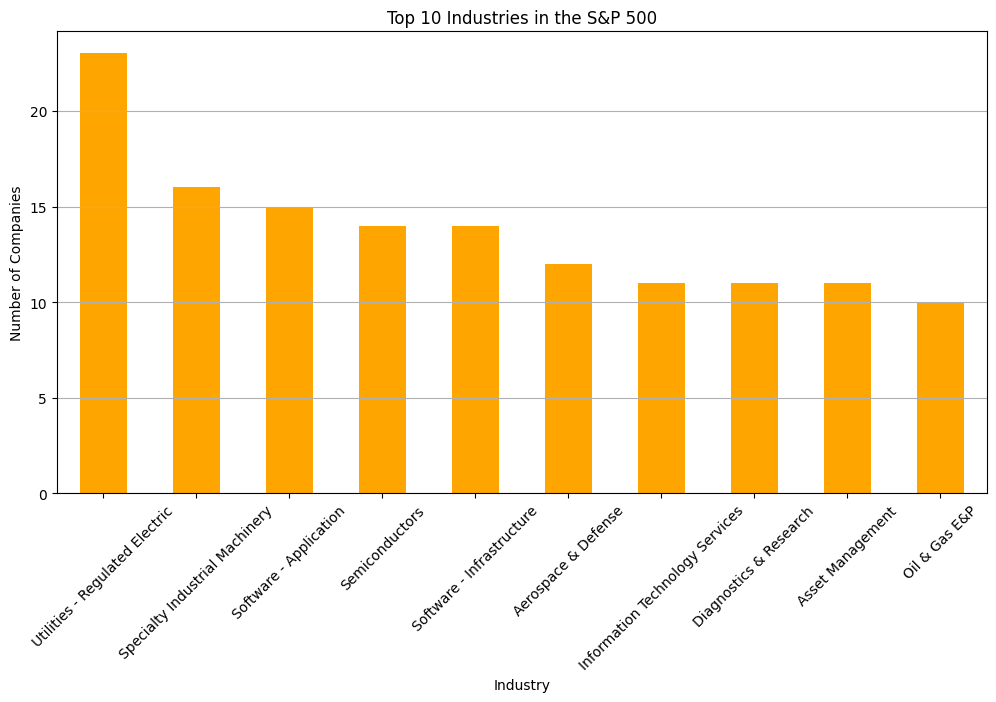

In [33]:

# Visualization 4: Industry Distribution (Bar Chart)
industry_distribution = sp500_companies['Industry'].value_counts().head(10)
plt.figure(figsize=(12, 6))
industry_distribution.plot(kind='bar', color='orange')
plt.title('Top 10 Industries in the S&P 500')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


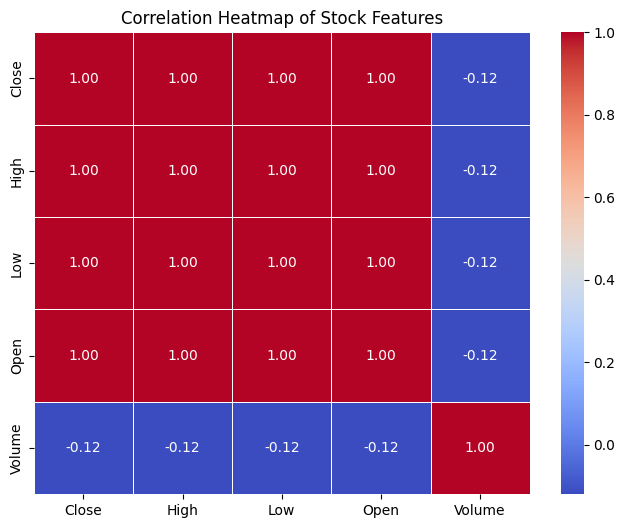

In [38]:

# Visualization 5: Correlation Heatmap of Stock Features
stock_features = sp500_stocks[['Close', 'High', 'Low', 'Open', 'Volume']]
stock_correlation = stock_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(stock_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Features')
plt.show()


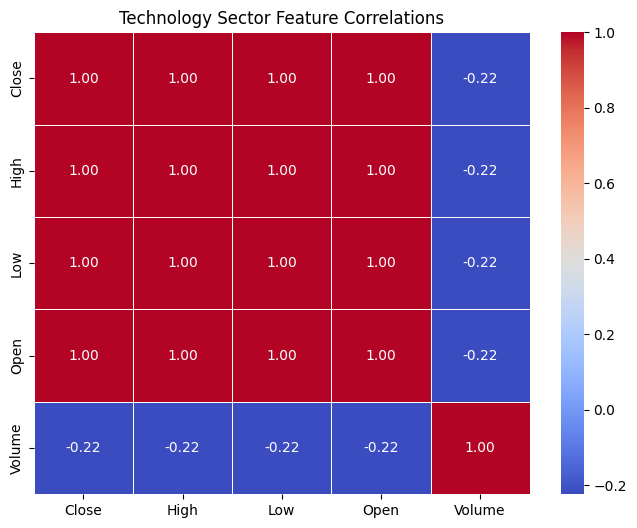

In [39]:
# Merge sector information into stock data
sp500_stocks_with_sector = sp500_stocks.merge(sp500_companies[['Symbol', 'Sector']], on='Symbol')

# Calculate sector-wise correlations
sector_correlation = sp500_stocks_with_sector.groupby('Sector')[['Close', 'High', 'Low', 'Open', 'Volume']].corr()

# Visualize correlation heatmap for a specific sector (e.g., Technology)
sector = 'Technology'
tech_corr = sector_correlation.loc[sector]
plt.figure(figsize=(8, 6))
sns.heatmap(tech_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'{sector} Sector Feature Correlations')
plt.show()


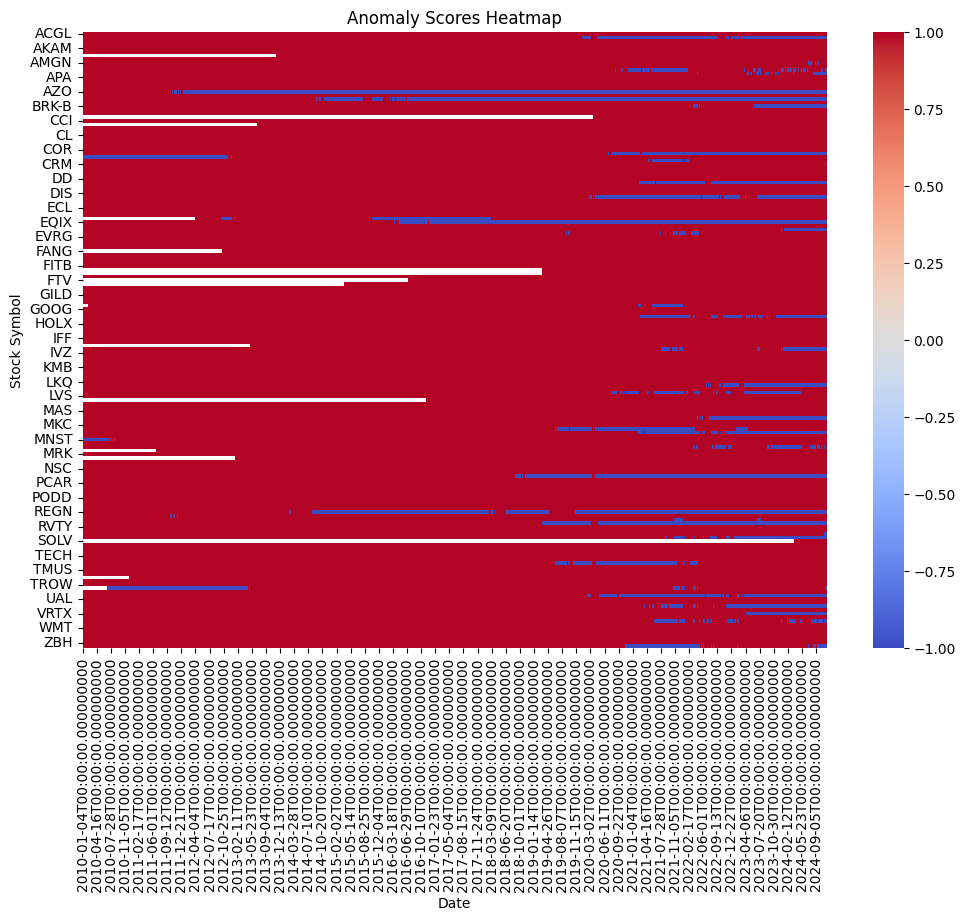

In [40]:
from sklearn.ensemble import IsolationForest

sp500_stocks = sp500_stocks.dropna(subset=['Close'])

# Fit Isolation Forest on sample data (e.g., Close prices)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
# sp500_stocks['Anomaly_Score'] = iso_forest.fit_predict(sp500_stocks[['Close']].dropna())
sp500_stocks['Anomaly_Score'] = iso_forest.fit_predict(sp500_stocks[['Close']])

# Pivot data for heatmap
anomaly_matrix = sp500_stocks.pivot(index='Symbol', columns='Date', values='Anomaly_Score')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(anomaly_matrix, cmap='coolwarm', center=0)
plt.title('Anomaly Scores Heatmap')
plt.xlabel('Date')
plt.ylabel('Stock Symbol')
plt.show()


In [1]:
# Compute daily returns
sp500_stocks['Return'] = sp500_stocks.groupby('Symbol')['Close'].pct_change()

# Filter for top 15 weighted stocks
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']
returns_data = sp500_stocks[sp500_stocks['Symbol'].isin(top_15_stocks)]

# Pivot data for correlation
return_matrix = returns_data.pivot(index='Date', columns='Symbol', values='Return')
return_corr = return_matrix.corr()

# Visualize the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(return_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Return Correlations of Top 15 Stocks')
plt.show()


NameError: name 'sp500_stocks' is not defined

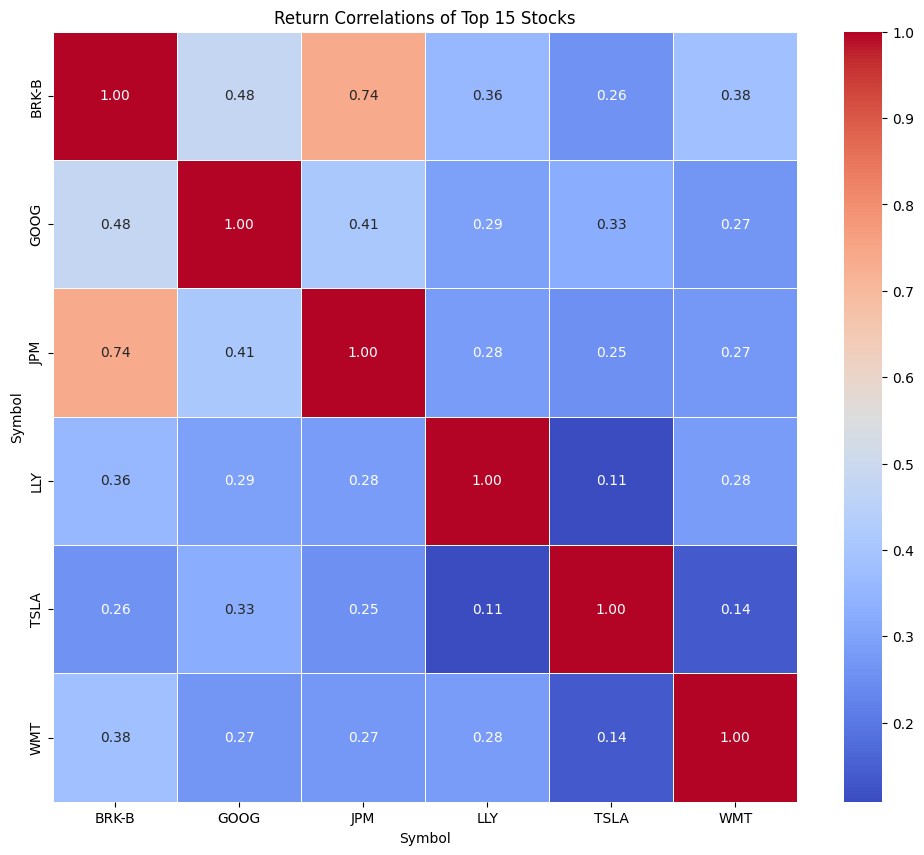

In [44]:
# Ensure all top 15 stocks have data in sp500_stocks
valid_top_15_stocks = top_15_stocks[top_15_stocks.isin(sp500_stocks['Symbol'])]

# Ensure there are valid stocks after filtering
if valid_top_15_stocks.empty:
    print("No valid top 15 stocks found in the sp500_stocks dataset.")
else:
    # Filter the data for valid stocks only
    returns_data = sp500_stocks[sp500_stocks['Symbol'].isin(valid_top_15_stocks)]

    # Pivot the data
    return_matrix = returns_data.pivot(index='Date', columns='Symbol', values='Return')

    # Check for missing data and handle it
    if return_matrix.empty:
        print("Pivot table is empty after filtering for top 15 stocks.")
    else:
        # Drop columns with all NaN values (stocks with no valid data)
        return_matrix = return_matrix.dropna(axis=1, how='all')

        # Ensure there are columns left for correlation
        if return_matrix.empty:
            print("No valid data remains after dropping NaN columns.")
        else:
            # Compute the correlation matrix
            return_corr = return_matrix.corr()

            # Ensure correlation matrix is not empty
            if return_corr.empty:
                print("Correlation matrix is empty.")
            else:
                # Visualize the heatmap
                plt.figure(figsize=(12, 10))
                sns.heatmap(return_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
                plt.title('Return Correlations of Top 15 Stocks')
                plt.show()


In [48]:
# Check which top 15 stocks are missing from the dataset
missing_stocks = set(top_15_stocks) - set(sp500_stocks['Symbol'])
print(f"Missing Stocks: {missing_stocks}")

# Check if stocks have sufficient data
valid_stocks = returns_data['Symbol'].value_counts()
print("Valid Stock Data Counts:")
print(valid_stocks)


Missing Stocks: {'V', 'AVGO', 'AAPL', 'UNH', 'META', 'AMZN', 'NVDA', 'MSFT', 'GOOGL'}
Valid Stock Data Counts:
Symbol
GOOG     3745
BRK-B    3745
JPM      3745
LLY      3745
WMT      3745
TSLA     3623
Name: count, dtype: int64


In [51]:
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']
top_15_stocks

0      AAPL
1      NVDA
2      MSFT
3      GOOG
4     GOOGL
5      AMZN
6      META
7      TSLA
8     BRK-B
9      AVGO
10      LLY
11      JPM
12      WMT
13        V
14      UNH
Name: Symbol, dtype: object

In [52]:
valid_stocks = returns_data['Symbol'].value_counts()
print("Valid Stock Data Counts:")
print(valid_stocks)

Valid Stock Data Counts:
Symbol
GOOG     3745
BRK-B    3745
JPM      3745
LLY      3745
WMT      3745
TSLA     3623
Name: count, dtype: int64


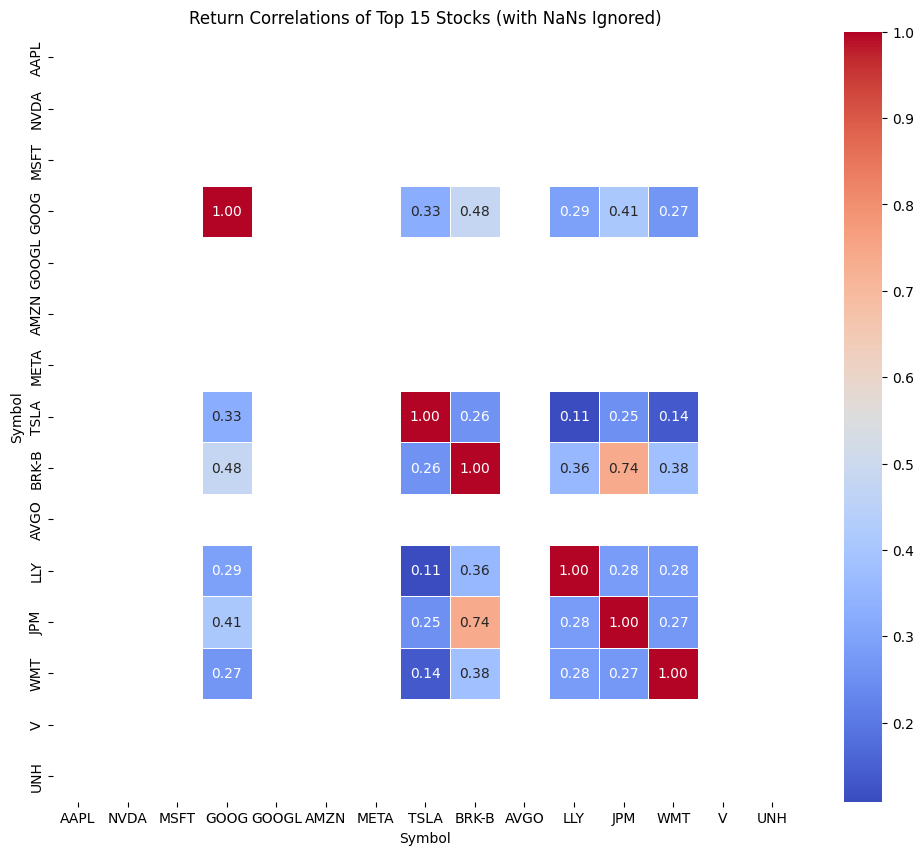

In [53]:
# Re-index the return matrix to ensure all top 15 stocks are included
return_matrix = returns_data.pivot(index='Date', columns='Symbol', values='Return')
return_matrix = return_matrix.reindex(columns=top_15_stocks)

# Compute the correlation matrix (NaN values will be ignored automatically)
return_corr = return_matrix.corr()

# Visualize the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(return_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Return Correlations of Top 15 Stocks (with NaNs Ignored)')
plt.show()


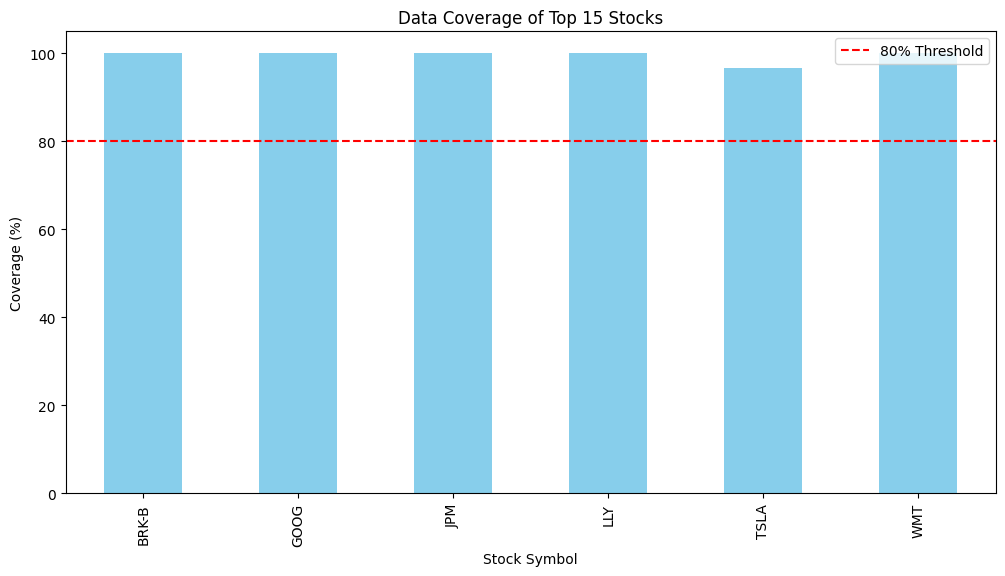

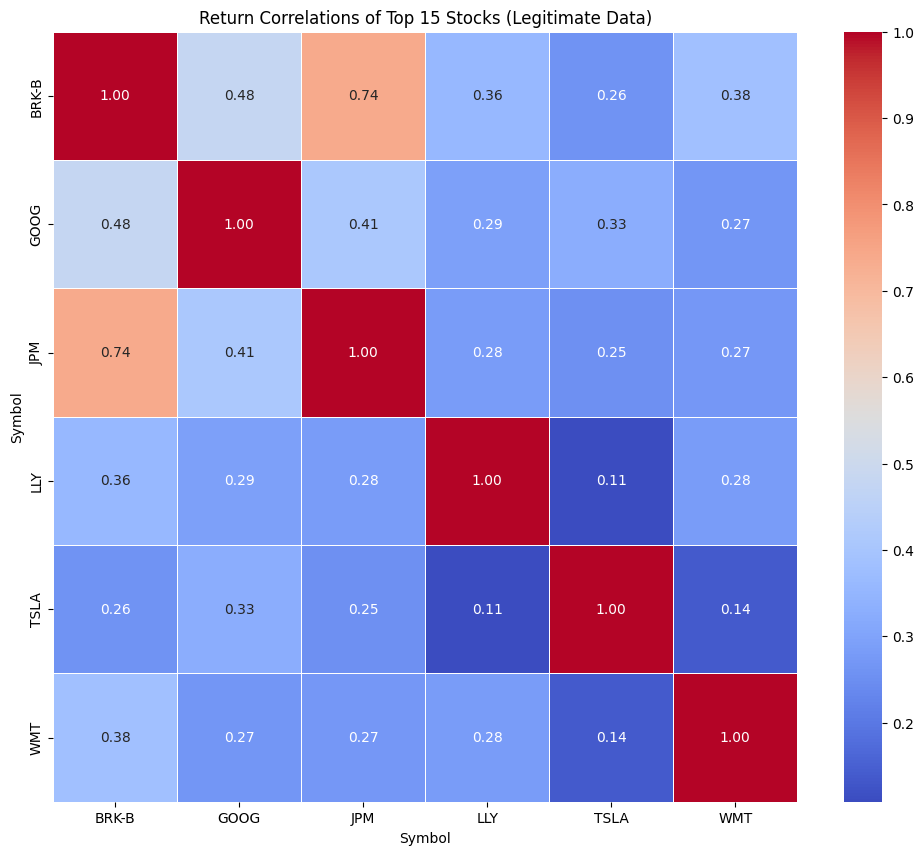

In [54]:
# Full implementation in one cell to handle missing data and create a legitimate heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute daily returns for stocks
sp500_stocks['Return'] = sp500_stocks.groupby('Symbol')['Close'].pct_change()

# Step 2: Filter for top 15 weighted stocks
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']

# Step 3: Pivot data for top 15 stocks
return_matrix = sp500_stocks[sp500_stocks['Symbol'].isin(top_15_stocks)] \
    .pivot(index='Date', columns='Symbol', values='Return')

# Step 4: Check for data coverage and filter stocks with sufficient data
min_data_threshold = int(0.8 * len(return_matrix))  # 80% of data availability
return_matrix_filtered = return_matrix.dropna(axis=1, thresh=min_data_threshold)

# Step 5: Compute the correlation matrix with pairwise deletion
return_corr = return_matrix_filtered.corr()

# Step 6: Visualize data coverage
data_coverage = return_matrix.count() / len(return_matrix) * 100  # Percentage of available data
plt.figure(figsize=(12, 6))
data_coverage.plot(kind='bar', color='skyblue')
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.title('Data Coverage of Top 15 Stocks')
plt.ylabel('Coverage (%)')
plt.xlabel('Stock Symbol')
plt.legend()
plt.show()

# Step 7: Create the final heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(return_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Return Correlations of Top 15 Stocks (Legitimate Data)')
plt.show()



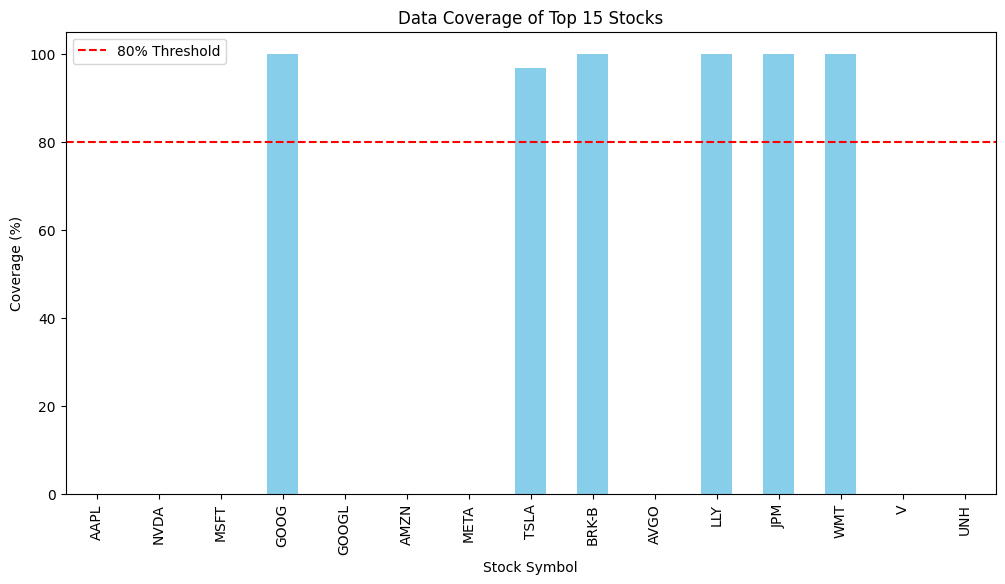

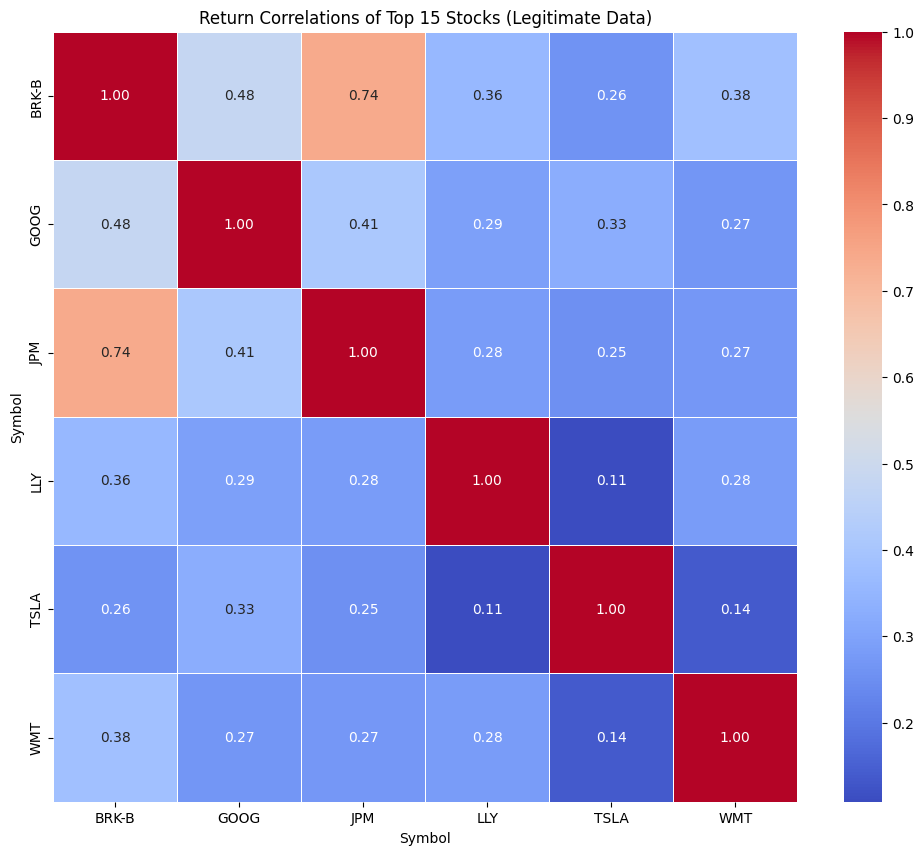

In [55]:
# Adjusting the implementation to plot data coverage for all 15 stocks, including those excluded from the heatmap

# Step 1: Compute daily returns for stocks
sp500_stocks['Return'] = sp500_stocks.groupby('Symbol')['Close'].pct_change()

# Step 2: Filter for top 15 weighted stocks
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']

# Step 3: Pivot data for all top 15 stocks
return_matrix = sp500_stocks[sp500_stocks['Symbol'].isin(top_15_stocks)] \
    .pivot(index='Date', columns='Symbol', values='Return')

# Step 4: Calculate data coverage for all top 15 stocks
data_coverage = return_matrix.count() / len(return_matrix) * 100  # Percentage of available data

# Step 5: Visualize data coverage for all top 15 stocks
plt.figure(figsize=(12, 6))
data_coverage.reindex(top_15_stocks).plot(kind='bar', color='skyblue')  # Ensure all top 15 are shown
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.title('Data Coverage of Top 15 Stocks')
plt.ylabel('Coverage (%)')
plt.xlabel('Stock Symbol')
plt.legend()
plt.show()

# Step 6: Filter stocks with sufficient data for the heatmap
min_data_threshold = int(0.8 * len(return_matrix))  # 80% of data availability
return_matrix_filtered = return_matrix.dropna(axis=1, thresh=min_data_threshold)

# Step 7: Compute the correlation matrix with pairwise deletion
return_corr = return_matrix_filtered.corr()

# Step 8: Create the final heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(return_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Return Correlations of Top 15 Stocks (Legitimate Data)')
plt.show()


Stocks with Low Data Coverage (< 80%):
Series([], dtype: float64)

Stocks with High Data Coverage (>= 80%):
Symbol
BRK-B    99.973298
GOOG     99.973298
JPM      99.973298
LLY      99.973298
TSLA     96.715621
WMT      99.973298
dtype: float64


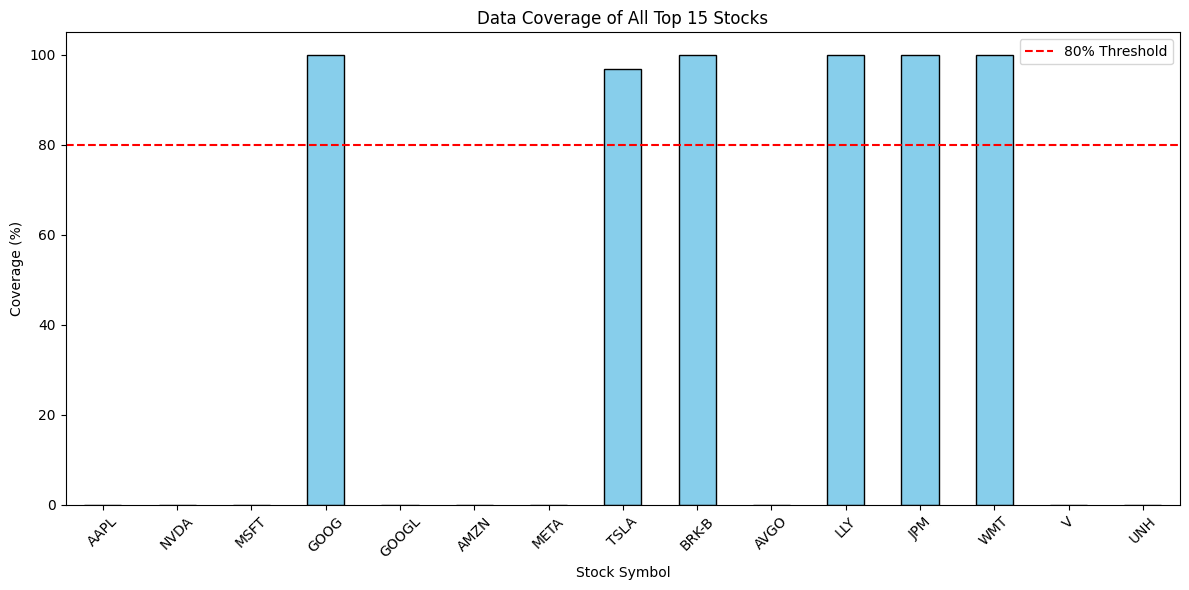

In [56]:
# Investigate why certain stocks are not included in the heatmap

# Step 1: Calculate data coverage for all top 15 stocks
data_coverage = return_matrix.count() / len(return_matrix) * 100  # Percentage of available data

# Step 2: Identify stocks with low coverage
low_coverage_stocks = data_coverage[data_coverage < 80]
high_coverage_stocks = data_coverage[data_coverage >= 80]

print("Stocks with Low Data Coverage (< 80%):")
print(low_coverage_stocks)

print("\nStocks with High Data Coverage (>= 80%):")
print(high_coverage_stocks)

# Step 3: Plot data coverage for all top 15 stocks
plt.figure(figsize=(12, 6))
data_coverage.reindex(top_15_stocks).plot(kind='bar', color='skyblue', edgecolor='black')  # Ensure all top 15 are plotted
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.title('Data Coverage of All Top 15 Stocks')
plt.ylabel('Coverage (%)')
plt.xlabel('Stock Symbol')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


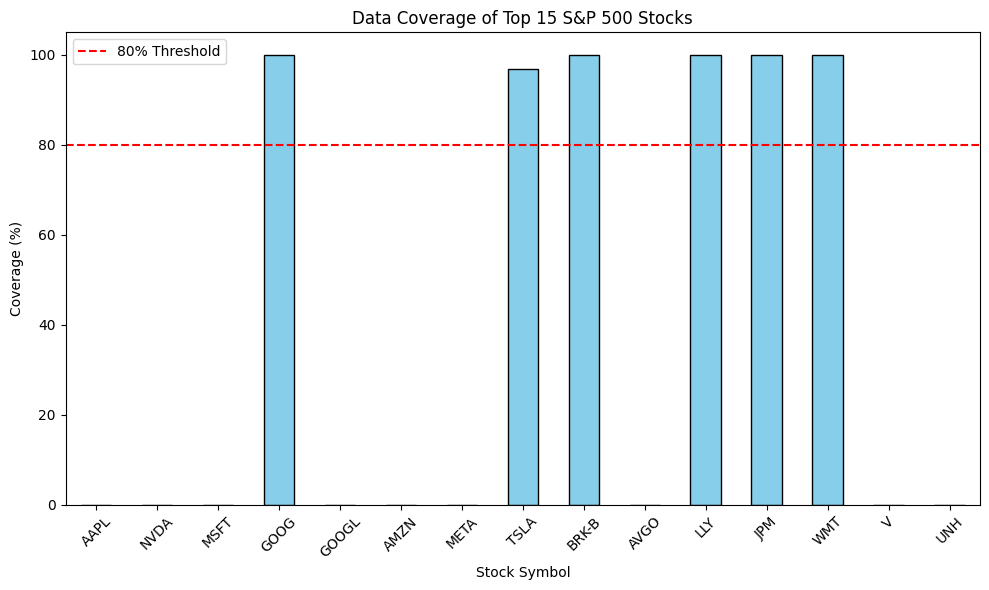

In [57]:
# Filter for top 15 stocks by weight
sp500_companies_path = 'sp500_companies.csv'
sp500_companies = pd.read_csv(sp500_companies_path)
top_15_stocks = sp500_companies.nlargest(15, 'Weight')['Symbol']

# Compute data coverage for top 15 stocks
top_15_coverage = data_coverage.reindex(top_15_stocks)

# Plot data coverage for top 15 stocks
plt.figure(figsize=(10, 6))
top_15_coverage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.title('Data Coverage of Top 15 S&P 500 Stocks')
plt.ylabel('Coverage (%)')
plt.xlabel('Stock Symbol')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Missing Stocks in sp500_stocks: {'V', 'AVGO', 'AAPL', 'UNH', 'META', 'AMZN', 'NVDA', 'MSFT', 'GOOGL'}
Data for NVDA:
Empty DataFrame
Columns: [Date, Symbol, Adj Close, Close, High, Low, Open, Volume, Return, Anomaly_Score]
Index: []
Data for MSFT:
Empty DataFrame
Columns: [Date, Symbol, Adj Close, Close, High, Low, Open, Volume, Return, Anomaly_Score]
Index: []
Data for GOOG:
            Date Symbol  Adj Close      Close       High        Low  \
74900 2010-01-04   GOOG  15.571998  15.610239  15.678981  15.547723   
74901 2010-01-05   GOOG  15.503423  15.541497  15.637387  15.480475   
74902 2010-01-06   GOOG  15.112601  15.149715  15.588072  15.102393   
74903 2010-01-07   GOOG  14.760787  14.797037  15.193053  14.760922   
74904 2010-01-08   GOOG  14.957565  14.994298  15.024933  14.672753   

            Open       Volume    Return  Anomaly_Score  
74900  15.615220   78541293.0       NaN              1  
74901  15.620949  120638494.0 -0.004404              1  
74902  15.588072  15974

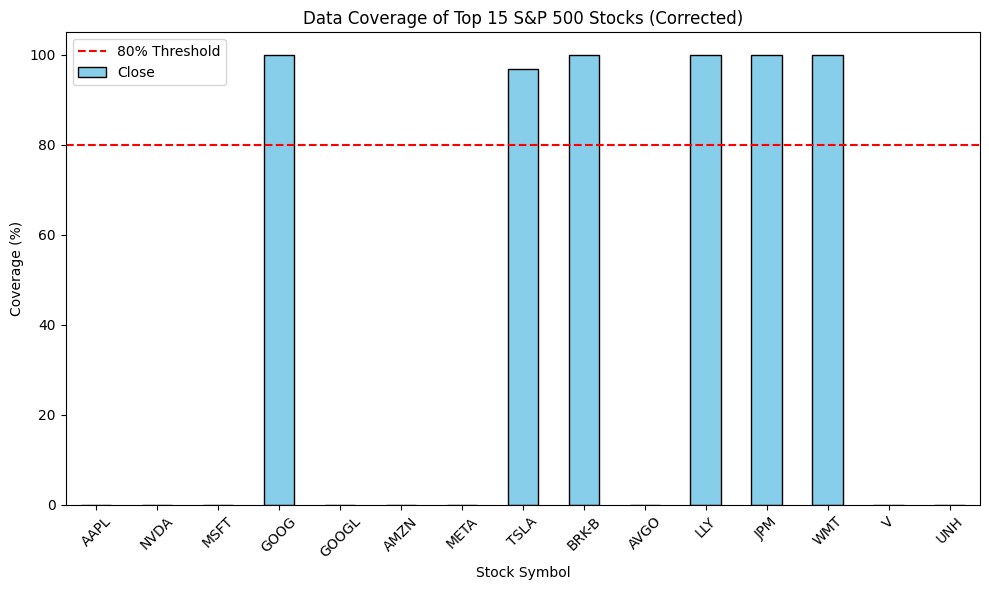

In [58]:
# Find missing symbols from the sp500_stocks dataset
missing_stocks = set(top_15_stocks) - set(sp500_stocks['Symbol'])
print(f"Missing Stocks in sp500_stocks: {missing_stocks}")

for stock in ['NVDA', 'MSFT', 'GOOG']:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == stock]
    print(f"Data for {stock}:")
    print(stock_data.head())

# Ensure we only count dates where data exists
data_coverage = sp500_stocks.groupby('Symbol')['Close'].count() / sp500_stocks['Date'].nunique() * 100
data_coverage = data_coverage.reindex(top_15_stocks)

# Plot data coverage for top 15 stocks after alignment
plt.figure(figsize=(10, 6))
data_coverage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.title('Data Coverage of Top 15 S&P 500 Stocks (Corrected)')
plt.ylabel('Coverage (%)')
plt.xlabel('Stock Symbol')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
# Check which symbols exist in both datasets
common_symbols = set(sp500_companies['Symbol']).intersection(set(sp500_stocks['Symbol']))
missing_in_stocks = set(top_15_stocks) - set(sp500_stocks['Symbol'])
print(f"Common Symbols: {common_symbols}")
print(f"Missing Top 15 Stocks in sp500_stocks: {missing_in_stocks}")


Common Symbols: {'EQT', 'LW', 'TMUS', 'TRGP', 'ENPH', 'HST', 'CNC', 'GDDY', 'WAB', 'PODD', 'BAC', 'OMC', 'ESS', 'GNRC', 'EXPD', 'ORLY', 'TYL', 'INTC', 'GILD', 'FOXA', 'BLK', 'TEL', 'FTV', 'WY', 'NSC', 'ISRG', 'EFX', 'SNPS', 'CRL', 'REGN', 'ZBH', 'FANG', 'PWR', 'LOW', 'RF', 'AZO', 'HSIC', 'MRK', 'TROW', 'PCG', 'BSX', 'MCK', 'GL', 'KMB', 'ANSS', 'AMGN', 'GPC', 'EVRG', 'CDW', 'FE', 'WMT', 'EQIX', 'ACGL', 'DFS', 'PCAR', 'TPR', 'HES', 'SOLV', 'KEY', 'SBUX', 'IBM', 'RVTY', 'VRTX', 'GEN', 'ROK', 'AVY', 'LLY', 'ZBRA', 'NCLH', 'DAL', 'CVX', 'MMM', 'COST', 'ADBE', 'TFX', 'FSLR', 'MKC', 'YUM', 'FCX', 'LVS', 'NDAQ', 'TGT', 'DRI', 'WAT', 'DD', 'MOH', 'BRK-B', 'AWK', 'DGX', 'ECL', 'AEP', 'LYV', 'MPC', 'CRM', 'USB', 'COR', 'FITB', 'CL', 'DE', 'DUK', 'IVZ', 'AMAT', 'ADP', 'GOOG', 'AXP', 'LDOS', 'BMY', 'TSLA', 'MAR', 'MCD', 'IQV', 'GE', 'ROP', 'STX', 'PTC', 'ERIE', 'CF', 'LH', 'PEG', 'EXR', 'IFF', 'CSCO', 'CPRT', 'EXC', 'DPZ', 'TRMB', 'EMR', 'AKAM', 'NEE', 'MKTX', 'STLD', 'ALLE', 'UAL', 'CHD', 'LHX', '

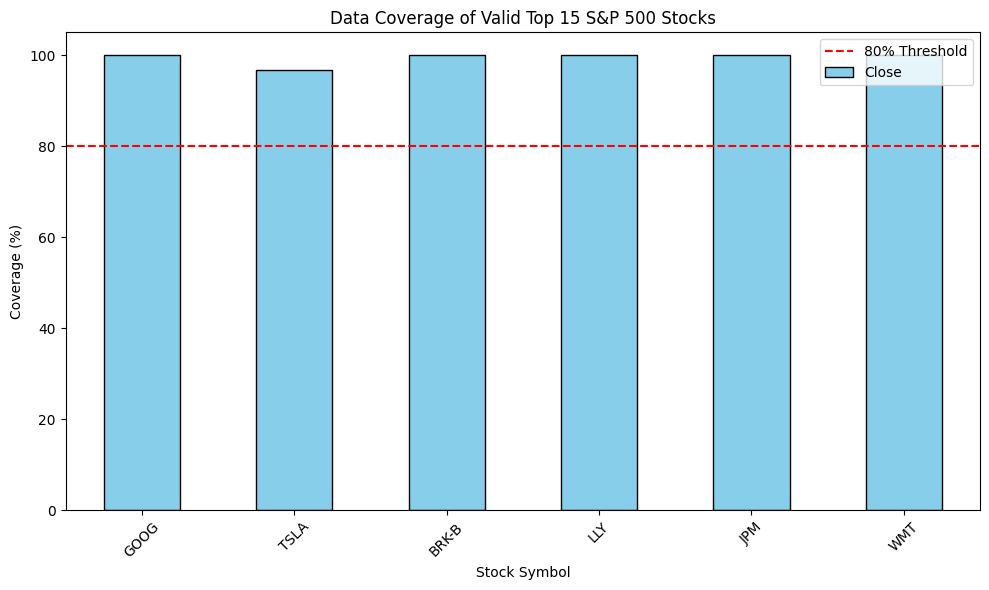

In [60]:
# Filter top 15 stocks that exist in sp500_stocks
valid_top_15 = top_15_stocks[top_15_stocks.isin(sp500_stocks['Symbol'])]

# Recompute data coverage for valid stocks
valid_coverage = data_coverage.reindex(valid_top_15)

# Visualize valid data coverage
plt.figure(figsize=(10, 6))
valid_coverage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.title('Data Coverage of Valid Top 15 S&P 500 Stocks')
plt.ylabel('Coverage (%)')
plt.xlabel('Stock Symbol')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
